# Titanic survivor prediction using Random forest ensemble method.

Author - Nithin J(nithin.janardhana3@gmail.com)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [44]:
Data= pd.read_csv("C:/Nithin Learning/Data sets/Titanic_train.csv")

In [6]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 12
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Unnamed: 12  0 non-null      float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


In [9]:
Data["Sex"].count()

891

In [12]:
Data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Text(0.5, 1.0, 'No. of Males & Females in the dataset')

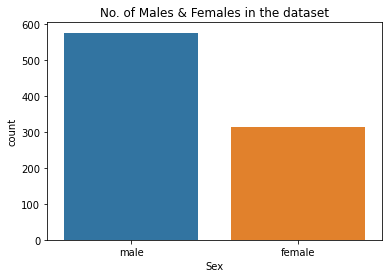

In [17]:
p = sns.countplot(data=Data, x = 'Sex')
plt.title("No. of Males & Females in the dataset")

In [18]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 12
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


Text(0.5, 1.0, 'Age category')

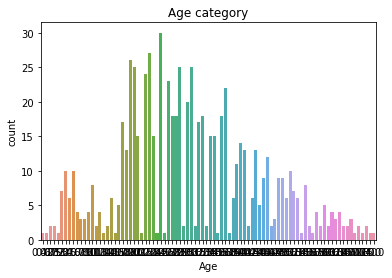

In [19]:
p = sns.countplot(data=Data, x = 'Age')
plt.title("Age category")

In [23]:
Datasample1=Data.sample(n = 30)

Text(0.5, 1.0, 'Age category')

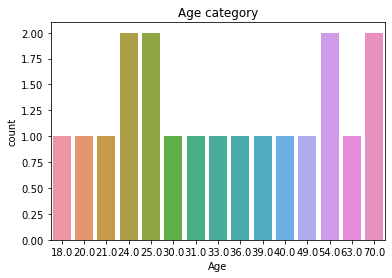

In [24]:
p = sns.countplot(data=Datasample1, x = 'Age')
plt.title("Age category")

In [25]:
Data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [26]:
Data.groupby(['Pclass','Sex']).size()

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

In [31]:
Data_Sex_df =pd.crosstab(index=[Data['Pclass']], columns=[Data['Sex']])

In [32]:
Data_Sex_df

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


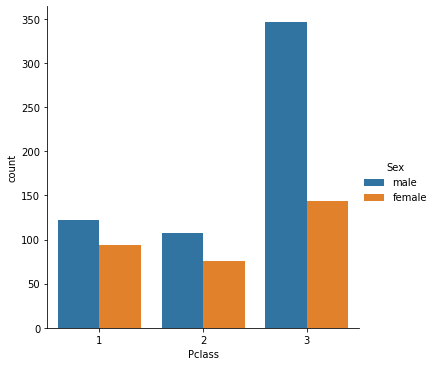

In [33]:
sns.factorplot(x = 'Pclass', data = Data, kind = 'count', hue = 'Sex')
plt.show()

In [37]:
Data["Age"].isnull().sum()

177

In [49]:
def male_female_child(passanger):
    if passanger.Age < 16:
        return 'child'
    else:
        return passanger.Sex

In [50]:
Data['Person'] = Data[['Age', 'Sex']].apply(male_female_child, axis = 1)

In [55]:
Data.groupby(['Pclass','Person']).size()

Pclass  Person
1       child       6
        female     91
        male      119
2       child      19
        female     66
        male       99
3       child      58
        female    114
        male      319
dtype: int64

In [54]:
Data["Person"]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Person, Length: 891, dtype: object

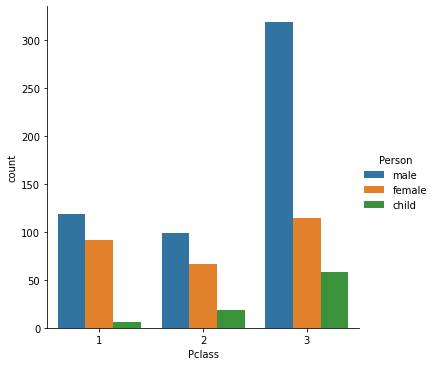

In [57]:
sns.factorplot('Pclass', kind = 'count', data = Data, hue = 'Person')
plt.show()

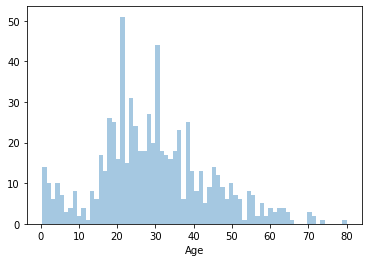

In [58]:
sns.distplot(a = Data.Age, bins = 70, kde = False)
plt.show()

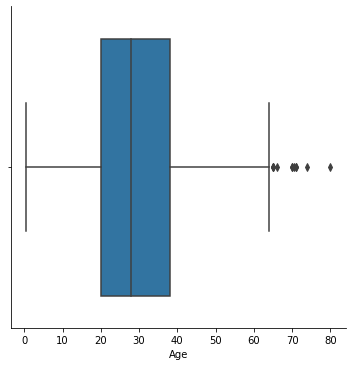

In [61]:
sns.factorplot('Age', kind = 'box', data = Data)
plt.show()

In [64]:
Data.Age.mean()

29.69911764705882

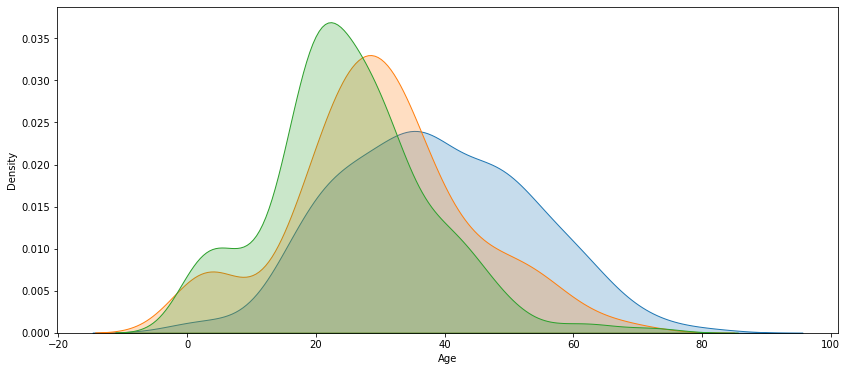

In [65]:
plt.figure(figsize = (14,6))
sns.kdeplot(data = Data[Data['Pclass']==1]['Age'], shade = True, label = 'Male')
sns.kdeplot(data =  Data[Data['Pclass']==2]['Age'], shade = True, label = 'Female')
sns.kdeplot(data =  Data[Data['Pclass']==3]['Age'], shade = True, label = 'Child')
plt.show()

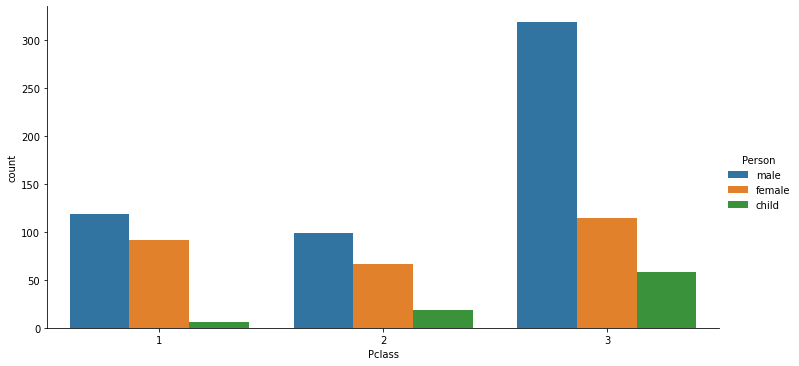

In [66]:
sns.factorplot('Pclass', data = Data, kind = 'count', hue = 'Person', aspect = 2)
plt.show()

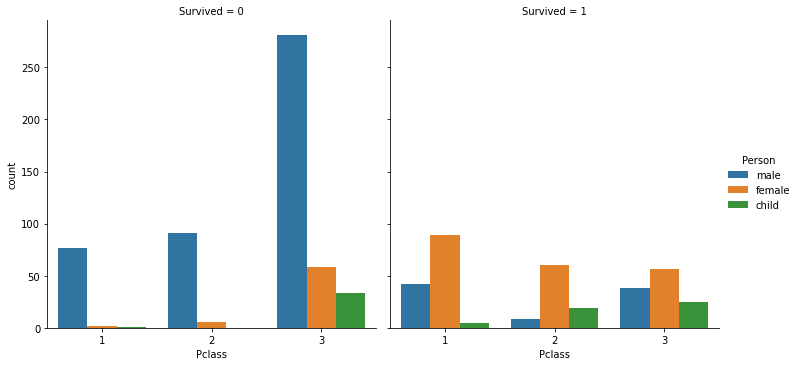

In [68]:
sns.factorplot('Pclass', data = Data, kind = 'count', hue = 'Person', col = 'Survived', aspect = 1)
plt.show()

In [70]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 12,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,male


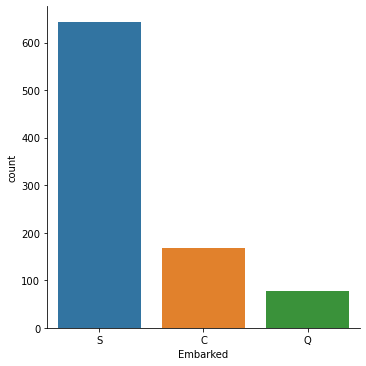

In [71]:
sns.factorplot('Embarked', data = Data, kind = 'count')
plt.show()

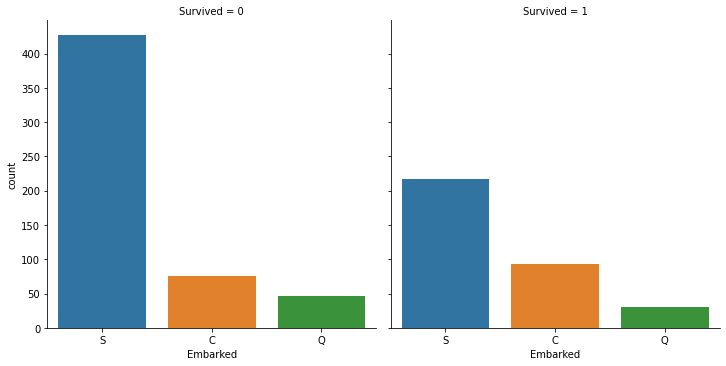

In [76]:
sns.factorplot('Embarked', data = Data, kind = 'count',  col = 'Survived', aspect = 1)
plt.show()

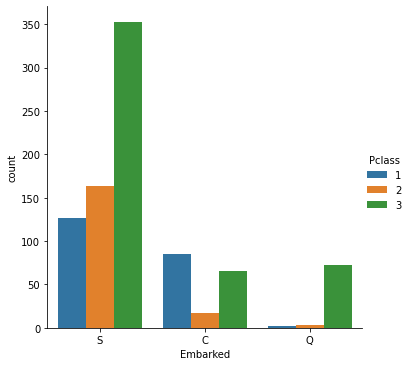

In [77]:
sns.factorplot('Embarked', data = Data, kind = 'count', hue = 'Pclass', aspect = 1)
plt.show()

From the figure above, one may conclude that almost all of the passengers who boarded from Queenstown were in third class. On the other hand, many who boarded from Cherbourg were in first class. The biggest portion of passengers who boarded the ship came from Southampton, in which 353 passengers were in third class, 164 in second class and 127 passengers were in first class. In such cases, one may need to look at the economic situation at these different towns at that period of time to understand why most passengers who boarded from Queenstown were in third class for example.

In [82]:
Data.groupby(['Embarked', 'Pclass']).size()

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
dtype: int64

In [83]:
def alone_with_family(passanger):
    if passanger.Parch == 0 and passanger.SibSp == 0:
        return 'alone'
    else:
        return 'with_family'

In [84]:
Data['alone_or_with_family'] = Data[['SibSp', 'Parch']].apply(alone_with_family, axis = 1)

In [85]:
Data['alone_or_with_family'].value_counts()

alone          537
with_family    354
Name: alone_or_with_family, dtype: int64

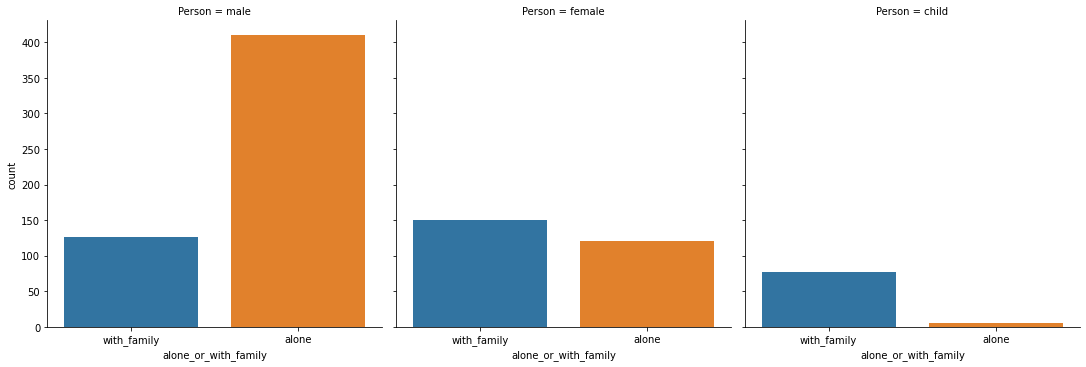

In [87]:
sns.factorplot('alone_or_with_family', data = Data, kind = 'count', col = 'Person')
plt.show()

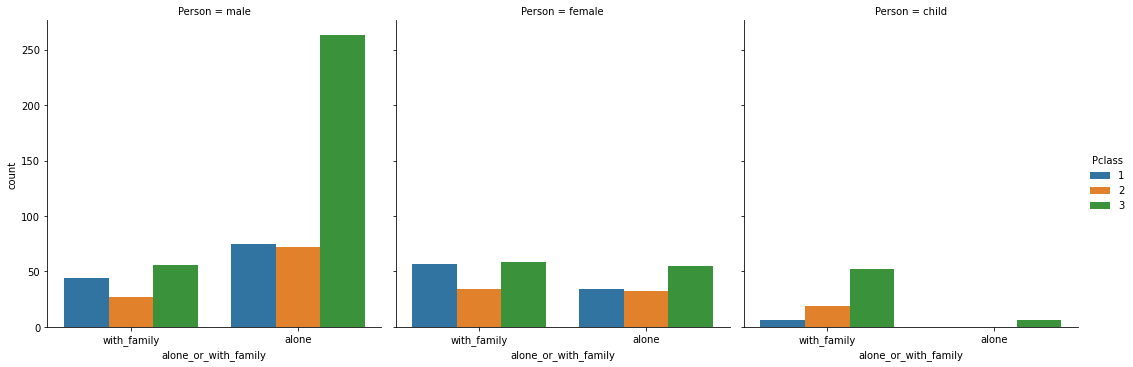

In [88]:
sns.factorplot('alone_or_with_family', data = Data, kind = 'count', hue = 'Pclass', col = 'Person')
plt.show()

In [89]:
pd.crosstab(index = [Data['alone_or_with_family'], Data['Person']], columns = [Data['Pclass']])

Pclass                        1   2    3
alone_or_with_family Person             
alone                child    0   0    6
                     female  34  32   55
                     male    75  72  263
with_family          child    6  19   52
                     female  57  34   59
                     male    44  27   56

In [91]:
  guess_ages = np.zeros((2,3))
  

In [92]:
  guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [93]:
 freq_port = Data.Embarked.dropna().mode()[0]

In [94]:
freq_port

'S'

In [104]:
def titanic_preprocessing(train, test):
#Load the dataframes using the reference, and combine the two dataframes to work on their data simulutaneaously
    train_df = pd.read_csv("C:/Nithin Learning/Data sets/Titanic_train.csv")
    test_df = pd.read_csv("C:/Nithin Learning/Data sets/Titanic_test.csv")
    combine = [train_df, test_df]
#Drop the 'Ticket', and 'Cabin' columns as they are not of relevancy    
    train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
    test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
    combine = [train_df, test_df]
#Make a new column 'Title' with everyone's designation
    for dataset in combine:
        dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

    pd.crosstab(train_df['Title'], train_df['Sex'])
#Replace uncommon titles with 'Rare'
    for dataset in combine:
        dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
        'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
#Correct incorrect titles
        dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
        dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
        dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

    train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
#Map the titles to numbers and fill '0' to missing titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    for dataset in combine:
        dataset['Title'] = dataset['Title'].map(title_mapping)
        dataset['Title'] = dataset['Title'].fillna(0)
#Drop 'Name' and 'PassangerId' columns
    train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
    test_df = test_df.drop(['Name'], axis=1)
    combine = [train_df, test_df]
#Map 'Sex' to numbers
    for dataset in combine:
        dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
#An array of 2 rows and 3 columns with 0's, representing the value of age to be filled for different combinations of 'Sex' 
#and 'Pclass'
    guess_ages = np.zeros((2,3))
    guess_ages

    for dataset in combine:
        for i in range(0, 2):
            for j in range(0, 3):
                guess_df = dataset[(dataset['Sex'] == i) & \
                                      (dataset['Pclass'] == j+1)]['Age'].dropna()

                age_guess = guess_df.median()

                guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

        for i in range(0, 2):
            for j in range(0, 3):
                dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                        'Age'] = guess_ages[i,j]

        dataset['Age'] = dataset['Age'].astype(int)
#New 'FamilySize' column
    for dataset in combine:
        dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

#New 'IsAlone' columns

    for dataset in combine:
        dataset['IsAlone'] = 0
        dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

    combine = [train_df, test_df]
#the most commonly used port to 'Embark' from(mode)
    freq_port = train_df.Embarked.dropna().mode()[0]

    for dataset in combine:
        dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
#Filling the missing values with the mode of 'Embarked'
    test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
    
    train_df = pd.get_dummies(train_df)
    test_df  = pd.get_dummies(test_df)

    test_df.head(10)
    return (train_df, test_df)

In [100]:
train= pd.read_csv("C:/Nithin Learning/Data sets/Titanic_train.csv")


In [101]:
test= pd.read_csv("C:/Nithin Learning/Data sets/Titanic_test.csv")

In [105]:
titanic_train, titanic_test = titanic_preprocessing(train, test)

In [106]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Unnamed: 12,Title,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22,1,0,7.2500,NaN,1,2,0,0,0,1
1,1,1,1,38,1,0,71.2833,NaN,3,2,0,1,0,0
2,1,3,1,26,0,0,7.9250,NaN,2,1,1,0,0,1
3,1,1,1,35,1,0,53.1000,NaN,3,2,0,0,0,1
4,0,3,0,35,0,0,8.0500,NaN,1,1,1,0,0,1


In [107]:
titanic_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,34,0,0,7.8292,1,1,1,0,1,0
1,893,3,1,47,1,0,7.0000,3,2,0,0,0,1
2,894,2,0,62,0,0,9.6875,1,1,1,0,1,0
3,895,3,0,27,0,0,8.6625,1,1,1,0,0,1
4,896,3,1,22,1,1,12.2875,3,3,0,0,0,1


In [120]:
Y_train = titanic_train['Survived']

In [119]:
X_train = titanic_train.iloc[:,1:]

In [127]:
Y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [118]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)

In [128]:
clf = clf.fit(X_train, Y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [125]:
X_train.drop(['Unnamed: 12'], axis = 1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Title,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22,1,0,7.2500,1,2,0,0,0,1
1,1,1,38,1,0,71.2833,3,2,0,1,0,0
2,3,1,26,0,0,7.9250,2,1,1,0,0,1
3,1,1,35,1,0,53.1000,3,2,0,0,0,1
4,3,0,35,0,0,8.0500,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,27,0,0,13.0000,5,1,1,0,0,1
887,1,1,19,0,0,30.0000,2,1,1,0,0,1
888,3,1,21,1,2,23.4500,2,4,0,0,0,1
889,1,0,26,0,0,30.0000,1,1,1,1,0,0


In [136]:
New_X_train=X_train.drop(['Unnamed: 12'], axis = 1)

In [137]:
New_X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int32  
 2   Age         891 non-null    int32  
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Title       891 non-null    int64  
 7   FamilySize  891 non-null    int64  
 8   IsAlone     891 non-null    int64  
 9   Embarked_C  891 non-null    uint8  
 10  Embarked_Q  891 non-null    uint8  
 11  Embarked_S  891 non-null    uint8  
dtypes: float64(1), int32(2), int64(6), uint8(3)
memory usage: 58.4 KB


In [139]:
clf = clf.fit(New_X_train, Y_train)

In [140]:
Y_pred = clf.predict(titanic_test.iloc[:,1:])

In [142]:
df_pred = pd.DataFrame([titanic_test.iloc[:,0], Y_pred]).T

In [143]:
df_pred

,PassengerId,Unnamed 0
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [144]:
df_pred.rename(columns = {'Unnamed 0': 'Survived'}, inplace = True)

In [145]:
df_pred

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [147]:
df_pred.to_csv('prediction_decision_tree.csv', index=False)

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
clf1 = RandomForestClassifier(n_estimators=15,criterion='gini',min_samples_leaf=5, max_depth=5,max_features='sqrt')

In [150]:
clf1 = clf1.fit(New_X_train,Y_train)

In [151]:

Y_pred_random_forest = clf1.predict(titanic_test.iloc[:,1:])


In [152]:
df_random = pd.DataFrame(np.array([titanic_test.iloc[:,0],Y_pred_random_forest]).T,columns=['PassengerId','Survived'])
df_random.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [156]:
df_random.to_csv('prediction_random_forest.csv',index=False)